<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Stacking_Empilhamento_com_varios_algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='Blue'> Stacking - Empilhamento de Algoritmos</font> 

O Stacking ou empilhamento é uma forma de aprendizado de máquina conjunta. Ele usa um algoritmo de metalearning para aprender a melhor combinar as previsões de **duas ou mais máquinas básicas**. Agrupamento de máquinas preemditivas, pega os resultados do algoritmos bases line e cria um novo meta algoritimo (tipo método ensamble)

O benefício do empilhamento é que ele pode aproveitar os recursos de uma variedade de modelos de bom desempenho em uma tarefa de classificação ou regressão e fazer previsões que podem ter **melhor desempenho do que qualquer modelo único no conjunto**. 

> Stacking é um algoritmo de **aprendizado de máquina conjunto** que aprende a melhor previsões de vários modelos de aprendizado de máquina com bom desempenho.



In [1]:
###############################################################################################################
# compare standalone models for binary classification
###############################################################################################################

#analise de dados
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification

# Processamento de Dados com validação cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Baseline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# será nossa MP definitiva - nosso meta modelo que precisa de outros modelos base acima, que pegará a saída do resultado de todos, e retornará no algoritmo definitivo
from sklearn.ensemble import StackingClassifier

In [ ]:
make_classification

In [4]:
# get the dataset. Criando dados sintéticos com X e Y
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict() #Criando um dicionário vazio
	models['lr'] = LogisticRegression() # chave e valor
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation. Avaliar cada modelo separado
def evaluate_model(model, X, y):
	# define the evaluation procedure. Primeiro, crio a validação cruzada
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.824 (0.038)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


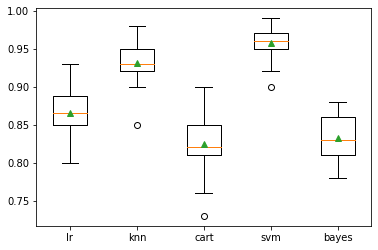

In [6]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()


for name, model in models.items():
	# evaluate the model

  
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
# vai comparar qual algoritmo teve melhor acurácia

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.820 (0.046)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.963 (0.019)


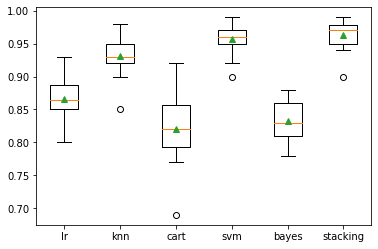

In [7]:
###############################################################################################################
# get a stacking ensemble of models
###############################################################################################################

def get_stacking():
	# define the base models. Estou criando o meus algortimos bases com uma lista
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
 

	# define meta learner model. Algoritmo meta que vai pegar a saída. 
	# Depois posso fazer um outro teste para usar outro algoritmo como meta. Primeiramente vou pegar o meta que será Regressão logistica
	level1 = LogisticRegression()
 

	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model


# get a list of models to evaluate. Vou seguir a mesma sequência criada anteriormente
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
 
 
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Criou o meta modelo (stracking) que é um ensamble e retorno um resultado melhor. Agrupamento de outros algoritmos para fazer predição

In [8]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models


level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))


# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble


model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)


###############################################################################################################
# make a prediction for one example
###############################################################################################################

row = [2.47475454, 0.40165523, 1.68081787, 2.88940715, 0.91704519, -3.07950644, 4.39961206, 0.72464273, -4.86563631, -6.06338084, -1.22209949, -0.4699618, 1.01222748, -0.6899355, -0.53000581, 6.86966784, -3.27211075, -6.59044146, -2.21290585, -3.139579]
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % (yhat))




Predicted Class: 0
